### Image Classification using ANN

In [2]:
# Import libraries and packages
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

## Load data from disk

In [3]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('animals')))   # data folder with 3 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
    # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
 
    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...
Time taken: 24.2 seconds
done


## Split data for training and validation

In [4]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

In [5]:
# convert the labels from integers/categories to vectors 
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)   
testY = lb.transform(testY)        

## Define neural network architecture using Keras

In [6]:
# define the 3072-1024-512-3 architecture using Keras

model = Sequential()   # input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))   # first hidden layer has 1024 nodes
model.add(Dense(512, activation="sigmoid"))                         # second hidden layer has 512 nodes
model.add(Dense(len(lb.classes_), activation="softmax"))            # output layer with number of possible class labels

In [7]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 60
 
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [8]:
# train the neural network on training data set
# batch_size (32) controls the size of each group of data to pass through the network. 
# Larger GPUs would be able to accommodate larger batch sizes (eg. 64)
time1 = time.time()   # to measure time taken
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/60
75/75 [==============================] - 1s 3ms/step - loss: 1.1125 - accuracy: 0.3450 - val_loss: 1.1150 - val_accuracy: 0.3217
Epoch 2/60
75/75 [==============================] - 0s 2ms/step - loss: 1.0915 - accuracy: 0.3729 - val_loss: 1.0749 - val_accuracy: 0.3633
Epoch 3/60
75/75 [==============================] - 0s 2ms/step - loss: 1.0675 - accuracy: 0.4246 - val_loss: 1.0521 - val_accuracy: 0.5017
Epoch 4/60
75/75 [==============================] - 0s 1ms/step - loss: 1.0490 - accuracy: 0.4642 - val_loss: 1.0447 - val_accuracy: 0.4300
Epoch 5/60
75/75 [==============================] - 0s 2ms/step - loss: 1.0364 - accuracy: 0.4688 - val_loss: 1.0126 - val_accuracy: 0.4967
Epoch 6/60
75/75 [==============================] - 0s 1ms/step - loss: 1.0207 - accuracy: 0.4762 - val_loss: 1.0120 - val_accuracy: 0.5117
Epoch 7/60
75/75 [==============================] - 0s 1ms/step - loss: 1.0043 - accuracy: 0.4846 - val_loss: 0.9811 - val_accuracy: 0.5217
Epoch 8/60
75/75 [==

## Evaluate Model

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
19/19 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

        cats       0.57      0.58      0.57       189
        dogs       0.49      0.46      0.48       193
       panda       0.74      0.78      0.76       218

    accuracy                           0.61       600
   macro avg       0.60      0.60      0.60       600
weighted avg       0.61      0.61      0.61       600



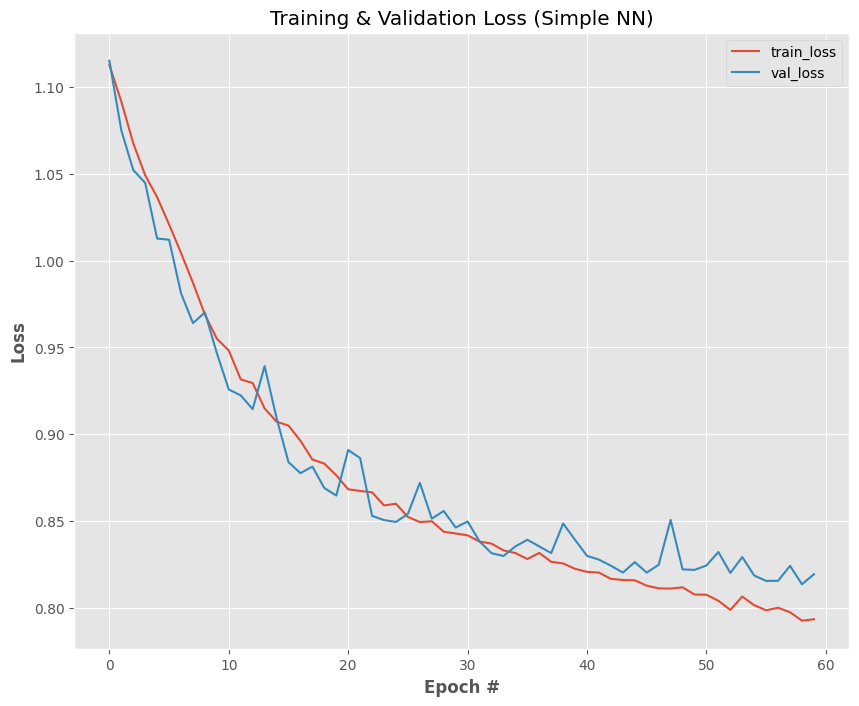

In [10]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

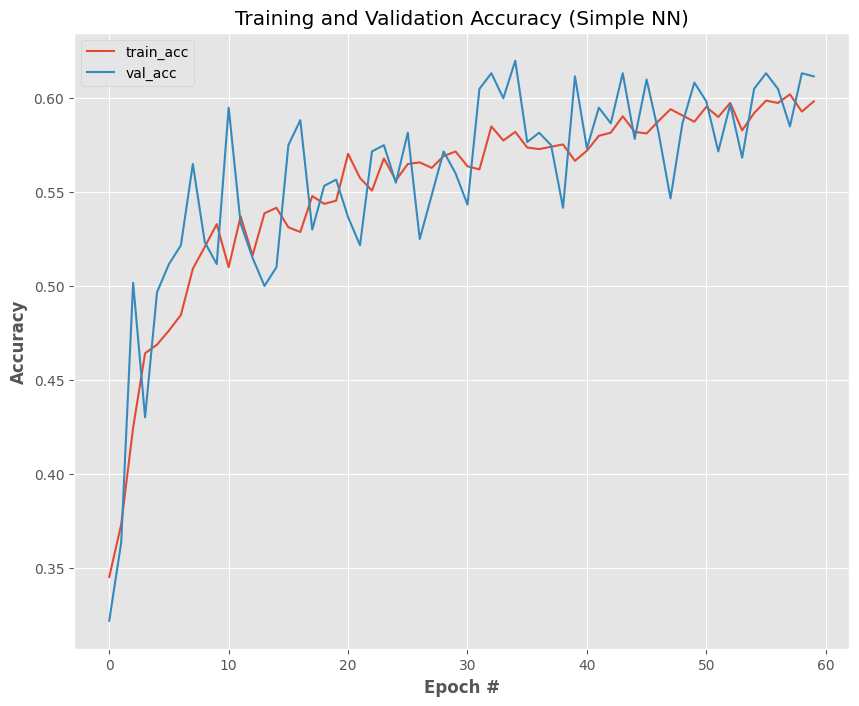

In [11]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

## Prediction

In [12]:
# load the input image and resize it to the target spatial dimensions
#image = cv2.imread("dog_test.jpg")
#image = cv2.imread("cat_test.jpg")
image = cv2.imread("panda_test.jpg")

output = image.copy()
image = cv2.resize(image, (32, 32))

# scale the pixel values to [0, 1]
image = image.astype("float") / 255.0

# for a simple fully-connected network, flatten the image
image = image.flatten()
image = image.reshape((1, image.shape[0]))


# make a prediction on the image
preds = model.predict(image)

# find the class label index with the largest corresponding probability
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

# draw the class label + probability on the output image
text = "{}: {:.1f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show the output image
cv2.imshow("Image", output)
cv2.waitKey(0)
  
# closing all open windows
cv2.destroyAllWindows()
cv2.imwrite('grayscale.jpg', output)


1/1 [==============================] - 0s 11ms/step


True

## Save model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________


In [14]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('simple_NN_model.h5')
f = open('simple_NN_label_bin', "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


Text(0, 0.5, 'Category')

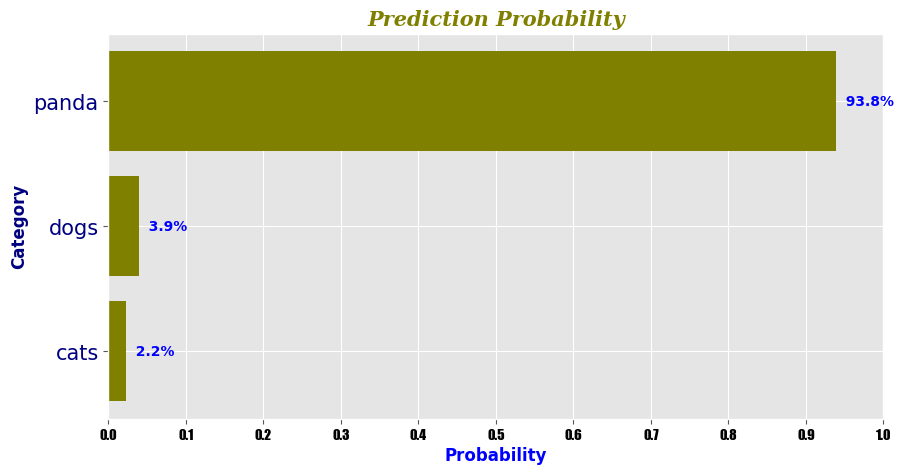

In [15]:
# plot the prediction probability for each category
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
plt.figure(figsize = [10,5])   # [width, height]

x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2] ]
y = [ preds[0][0], preds[0][1], preds[0][2] ]
plt.barh(x, y, color='olive')

ticks_x = np.linspace(0, 1, 11)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15, color='navy' )
for i, v in enumerate(y):
    plt.text(v, i, "  "+str((v*100).round(1))+"%", color='blue', va='center', fontweight='bold')

plt.title('Prediction Probability', family='serif', fontsize=15, style='italic', weight='bold', color='olive', loc='center', rotation=0)
plt.xlabel('Probability', fontsize=12, weight='bold', color='blue')
plt.ylabel('Category', fontsize=12, weight='bold', color='navy')